In [9]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy.optimize import basinhopping as bh
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/weights_heights.csv', index_col='Index')

# *Больцмановский отжиг.*

[32.31029652761077, 18.74282612415317] 13.031216243117
 
18.74 x + 32.31



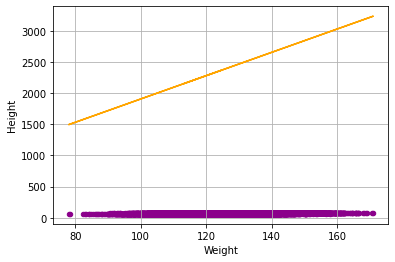

In [ ]:
F_begin = 100
F_opt = F_begin
T = 7.78
X_opt = [0, 0]
T_i = T
x0 = np.random.uniform(20, 25, 1)[0]
x1 = np.random.uniform(10, 12, 1)[0]
Point_x = [x0, x1]
F_x = square_error(Point_x)
if F_x < F_begin:
    F_opt = F_x
for i in range(1, 100):
    N_x = npr.normal(0,1)
    N_y = npr.normal(0,1)
    Point_x[0] = Point_x[0] + T_i * N_x
    Point_x[1] = Point_x[1] + T_i * N_y
    F_x = square_error(Point_x)
    if F_x < F_opt:
        X_opt = Point_x
        F_opt = F_x
    else:
        a = npr.random_sample()
        P = np.exp(-((F_x - F_opt) / T_i))
        if P > a:
          X_opt = Point_x
          F_opt = F_x
    T_i = T / np.log(1 + i)
print(X_opt, F_opt)

p1 = np.poly1d([X_opt[1], X_opt[0]])
print(p1)
print()
x = np.array(data['Weight'])
y = [X_opt[0] + i * X_opt[1] for i in x]
data.plot(y='Height', x='Weight', kind='scatter', color='darkmagenta')
plt.plot(x, y, color='orange')
plt.grid()

In [ ]:
def square_error(w):
    sum = 0
    x = list(data['Weight'])
    y = list(data['Height'])
    for i in range(1, len(data.index)):
        sum += (y[i] - (w[0] + w[1] * x[i])) ** 2
    return np.sqrt(sum / data.shape[0])

# *Реализация при помощи библиотеки SciPy.*

In [ ]:
def print_fun(x, f, accepted):
        print("at minimum %.4f accepted %d" % (f, int(accepted)))

In [ ]:
minimizer_kwargs = {"method":"L-BFGS-B"}
ret = bh(square_error, [0.,0.], minimizer_kwargs=minimizer_kwargs, niter=1, callback=print_fun)

at minimum 1.6437 accepted 1


In [ ]:
print("X_opt = [%.4f, %.4f], F_opt = %.4f" % (ret.x[0], ret.x[1], ret.fun))

X_opt = [57.5724, 0.0820], F_opt = 1.6437


In [ ]:
p1 = np.poly1d([ret.x[1], ret.x[0]])
print(p1)

 
0.082 x + 57.57


In [ ]:
p1(127)

67.98664361669337

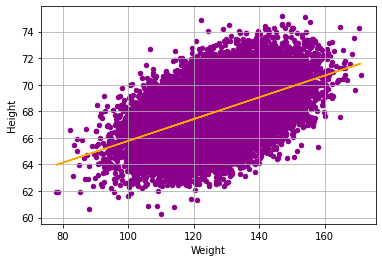

In [ ]:
x = np.array(data['Weight'])
y = [ret.x[0] + i * ret.x[1] for i in x]
data.plot(y='Height', x='Weight', kind='scatter', color='darkmagenta')
plt.plot(x, y, color='orange')
plt.grid()